In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
from IPython.display import Image

Accessing Individual Pixels
Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.

In [2]:
image = cv2.imread('checkerboard_18x18.png',0)
print(image)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [3]:
print(image[0,0])
print(image[0,6])

0
255


Modifying Image Pixels
We can modify the intensity values of pixels in the same manner as described above.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

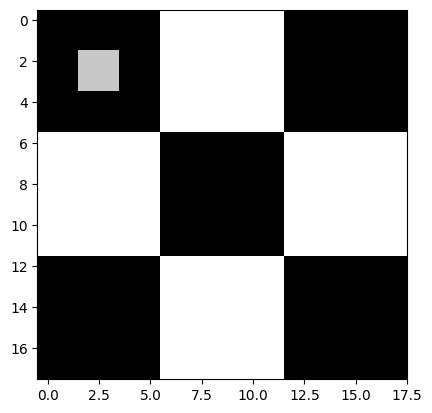

In [4]:
image_copy = image.copy()
image_copy[2,2] = 200
image_copy[2,3] = 200
image_copy[3,2] = 200
image_copy[3,3] = 200

plt.imshow(image_copy, cmap='gray')
print(image_copy)

Cropping Images
Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

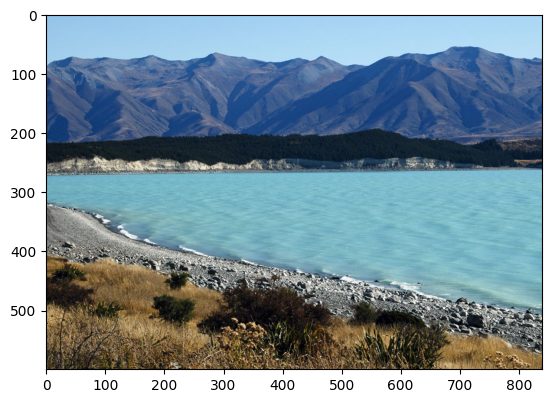

In [5]:
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

Crop out the middle region of the image


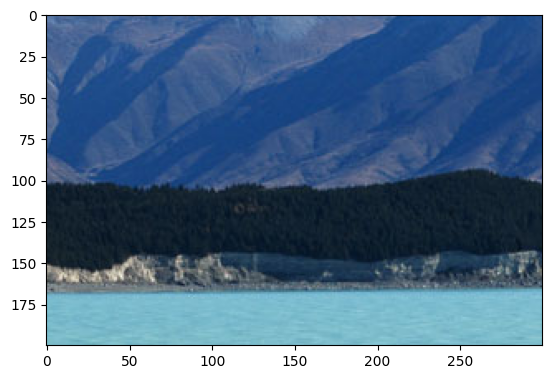

In [6]:
cropped_region  = img_NZ_rgb[100:300,300:600]
plt.imshow(cropped_region)

Resizing Images
The function resize resizes the image src down to or up to the specified size. The size and type are derived from the src,dsize,fx, and fy.

Function Syntax
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
dst: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has 2 required arguments:

src: input image

dsize: output image size

Optional arguments that are often used include:

fx: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

fy: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same

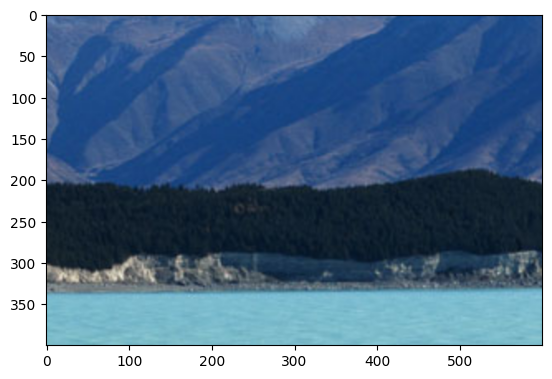

In [7]:
resize_cropped_region_2x = cv2.resize(cropped_region,None,fx=2,fy=2)
plt.imshow(resize_cropped_region_2x)

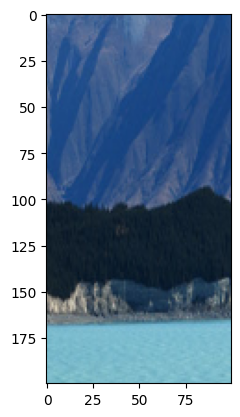

In [8]:
desired_width = 100
desired_height = 200
dim = (desired_width,desired_height)

#Resize the background image to the desired size
resize_cropped_region = cv2.resize(cropped_region,dsize=dim,interpolation=cv2.INTER_AREA) #INTER_AREA is for shrinking
plt.imshow(resize_cropped_region)

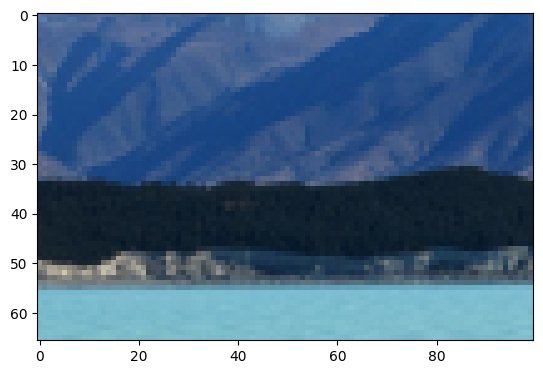

In [9]:
#Method 2 using aspect ratio
desired_width = 100
aspect_ratio = desired_width/cropped_region.shape[1]
desired_height = int(aspect_ratio*cropped_region.shape[0])
dim = (desired_width,desired_height)

#Resize the background image to the desired size
resize_cropped_region_asp  = cv2.resize(cropped_region,dsize=dim,interpolation=cv2.INTER_AREA) #INTER_AREA is for shrinking
plt.imshow(resize_cropped_region_asp)

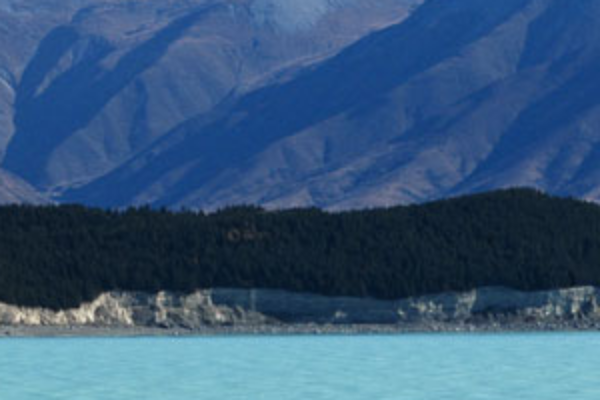

In [10]:
#Swap channel order
resize_cropped_region_2x_rgb = resize_cropped_region_2x[:,:,::-1]

#Save the image
cv2.imwrite("New_Zealand_Lake_cropped_region_2x.png",resize_cropped_region_2x_rgb)

#Display the image
Image(filename="New_Zealand_Lake_cropped_region_2x.png")

The function flip flips the array in one of three different ways (row and column indices are 0-based):

Function Syntax
dst = cv.flip( src, flipCode )
dst: output array of the same size and type as src.

The function has 2 required arguments:

src: input image
flipCode: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

Text(0.5, 1.0, 'Flipped Both')

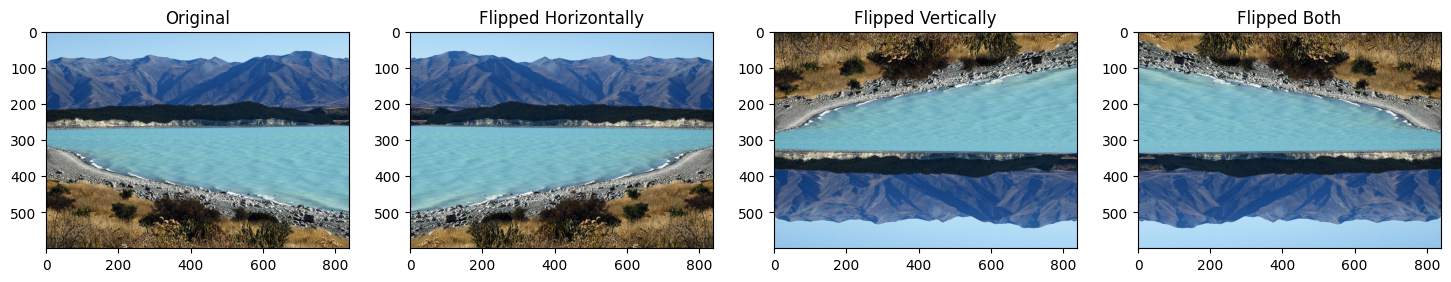

In [11]:
img_NZ_rgb_flipped_horizontally = cv2.flip(img_NZ_rgb,1)
img_NZ_rgb_flipped_vertically = cv2.flip(img_NZ_rgb,0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb,-1)

plt.figure(figsize=(18,5))
plt.subplot(1,4,1);plt.imshow(img_NZ_rgb);plt.title("Original")
plt.subplot(1,4,2);plt.imshow(img_NZ_rgb_flipped_horizontally);plt.title("Flipped Horizontally")
plt.subplot(1,4,3);plt.imshow(img_NZ_rgb_flipped_vertically);plt.title("Flipped Vertically")
plt.subplot(1,4,4);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Flipped Both")


(600, 840, 3)
1512000


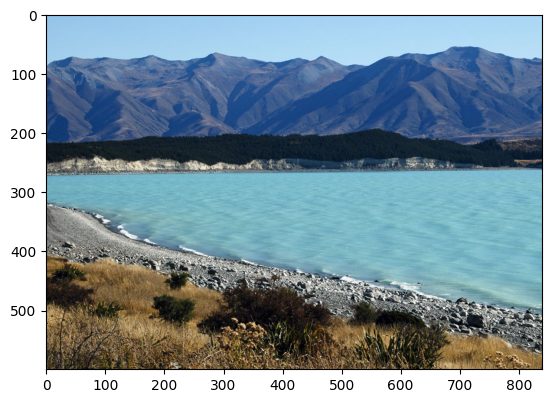

In [14]:
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)
print(img_NZ_rgb.shape)
print(img_NZ_rgb.size)

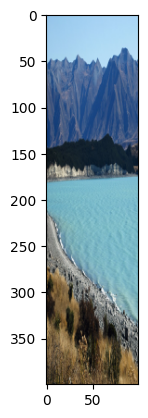

In [21]:
resize_image = cv2.resize(img_NZ_rgb,dsize=(100,400),interpolation=cv2.INTER_AREA)
plt.imshow(resize_image)